In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
df = pd.read_csv("project_metrics_v3.csv")

In [53]:
df['STA-1'] = pd.to_datetime(df['STA-1'])
# Step 2: Calculate the difference in years without NumPy
reference_date = pd.to_datetime('2023-01-01')  # Choose a reference date
df['years_since'] = (reference_date - df['STA-1']).dt.days / 365.25

# Display only the 'years_since' column
print(df['years_since'])

0       5.259411
1       9.593429
2      13.612594
3      12.599589
4       8.739220
         ...    
231    13.054073
232     7.148528
233     5.982204
234     3.835729
235    13.166324
Name: years_since, Length: 236, dtype: float64


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   project           236 non-null    object        
 1   COM-1             236 non-null    object        
 2   COM-3             236 non-null    object        
 3   POP-4             236 non-null    int64         
 4   STA-1             236 non-null    datetime64[ns]
 5   STA-2             236 non-null    int64         
 6   STA-4             236 non-null    int64         
 7   STA-5             236 non-null    object        
 8   STA-6             236 non-null    int64         
 9   STA-7             236 non-null    object        
 10  STA-10            236 non-null    object        
 11  STA-11            236 non-null    object        
 12  STA-12            236 non-null    object        
 13  TEC-1             236 non-null    int64         
 14  TEC-2.1           207 non-

In [55]:
df.describe()

,POP-4,STA-2,STA-4,STA-6,TEC-1,SWQ-4.1,SWQ-4.2,SWQ-4.3,SWQ-4.4,SWQ-4.5,SWQ-4.6,SWQ-4.7,frequency(weeks),years_since
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,232.000000,236.000000,236.0,236.000000
mean,6093.758475,132.741525,1061.385593,3.584746,784.097458,50.072246,16.788136,6.449153,19.983051,55.652542,16.853442,409.309322,12.0,9.203923
std,17429.283704,408.813942,3255.502603,3.673543,1881.302644,40.591363,15.990344,11.537615,50.665609,155.612879,12.197226,622.254858,0.0,2.817886
min,2.000000,-1219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,0.087611
25%,155.750000,6.000000,36.500000,1.000000,0.000000,19.557500,0.000000,0.000000,1.000000,3.000000,9.195651,146.500000,12.0,7.134839
50%,435.000000,59.000000,115.000000,2.000000,0.000000,43.405000,12.500000,1.000000,6.000000,16.000000,14.315029,257.500000,12.0,8.859685
75%,2910.000000,214.250000,628.750000,4.000000,530.250000,74.342500,33.000000,7.000000,18.000000,55.000000,20.166655,436.250000,12.0,11.392197
max,130120.000000,3357.000000,26996.000000,32.000000,12032.000000,315.720000,48.000000,50.000000,558.000000,1843.000000,83.803601,5637.000000,12.0,13.763176


In [56]:
X = df['years_since']
y = df['POP-4']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

X_train

204    13.612594
25      6.442163
86      9.130732
184     8.188912
84     13.262149
         ...    
106     8.780287
14     13.251198
92      8.761123
179     6.532512
102    12.054757
Name: years_since, Length: 212, dtype: float64

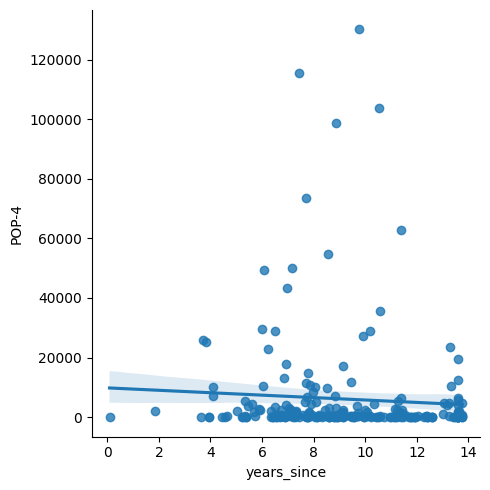

In [57]:
sns.lmplot(x = 'years_since',
           y = 'POP-4',
           data = df
           )

In [58]:
lm = LinearRegression()

In [59]:
lm.fit(X_train, y_train)
LinearRegression()

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
lm.coef_

In [ ]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions